In [44]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [45]:
class AgentState(TypedDict):
    num1: int
    num2: int
    num3: int
    num4: int
    operation: Literal['+', '-']
    operation2: Literal['+', '-']
    result: int
    result2: int

In [46]:
def adder(state: AgentState) -> AgentState:
    """This function add two number and store result in result"""
    state['result'] = state['num1'] + state['num2']
    return state

def subtract(state: AgentState) -> AgentState:
    """This function subtract two number and store result in result"""
    state['result'] = state['num1'] - state['num2']
    return state

def adder2(state: AgentState) -> AgentState:
    """This function add two number and store result in result"""
    state['result2'] = state['num3'] + state['num4']
    return state

def subtract2(state: AgentState) -> AgentState:
    """This function subtract two number and store result in result"""
    state['result2'] = state['num3'] - state['num4']
    return state

def router(state: AgentState) -> str:
    """This function add two number and store result in result"""
    if state['operation'] == '+':
        return "adder"
    else:
        return "subtract"

def router2(state: AgentState) -> str:
    """This function add two number and store result in result"""
    if state['operation2'] == '+':
        return "adder2"
    else:
        return "subtract2"

In [47]:
graph = StateGraph(AgentState)

graph.add_node("adder", adder)
graph.add_node("subtract", subtract)

graph.add_node("adder2", adder2)
graph.add_node("subtract2", subtract2)

graph.add_node("router", lambda x: x)
graph.add_node("router2", lambda x: x)

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    router,
    {
        "adder":"adder",
        "subtract":"subtract"
    }
)

graph.add_edge("adder", "router2")
graph.add_edge("subtract", "router2")


graph.add_conditional_edges(
    "router2",
    router2,
    {
        "adder2":"adder2",
        "subtract2":"subtract2"
    }
)

graph.add_edge("adder2", END)
graph.add_edge("subtract2", END)


app = graph.compile()

In [48]:
app.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'adder': Node(id='adder', name='adder', data=adder(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'subtract': Node(id='subtract', name='subtract', data=subtract(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'adder2': Node(id='adder2', name='adder2', data=adder2(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'subtract2': Node(id='subtract2', name='subtract2', data=subtract2(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'router': Node(id='router', name='router', data=router(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'router2': Node(id='router2', name='router2', data=router2(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), '__end__':

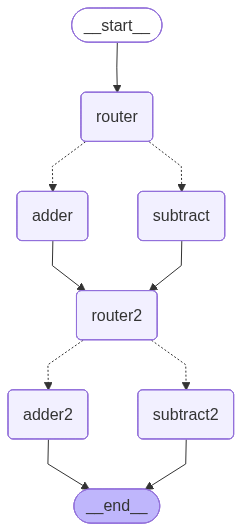

In [49]:
from IPython.display import Image, display
display(Image(app.get_graph(). draw_mermaid_png()))

In [50]:
result = app.invoke({"num1": 5, "num2": 10, "operation": "+", "num3": 4, "num4": 1, "operation2": "-"})

print(result)

{'num1': 5, 'num2': 10, 'num3': 4, 'num4': 1, 'operation': '+', 'operation2': '-', 'result': 15, 'result2': 3}
